In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from cplAE_TE.utils.load_helpers import get_paths
sns.set()

In [2]:
paths = get_paths(warn=False,write_toml=False)

In [3]:
def scatter3(X,col,xlims=(3,3),ylims=(3,3),zlims=(3,3)):
    sns.set_style("whitegrid")
    plt.ion()
    fig = plt.figure(figsize=(4,4))    
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:,0], X[:,1], X[:,2],s=1,alpha=1,c=col)

    ax.set_xticks([])
    ax.set_zticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_zlim(zlims[0],zlims[1])

    plt.axis('on')
    ax.set_frame_on(False)
    plt.tight_layout()
    return ax,sc

In [4]:
#Full data matrices
csTE='1-0'
O = sio.loadmat(paths['proc_dataset'],squeeze_me=True)
D = sio.loadmat(paths['exp_kfold']+\
                f'NM_Edat_pcipfx_aT_1-0_aE_1-0_cs_{csTE}_ad_1_'+\
                f'ld_3_bs_200_se_500_ne_1500_cv_10_ri_0-summary.mat',
                squeeze_me=True)

xlims=(-3,3)
ylims=(-3,3)
zlims=(-3,3)
padval=-210
fontsizeval=13
init_elev = -31.0

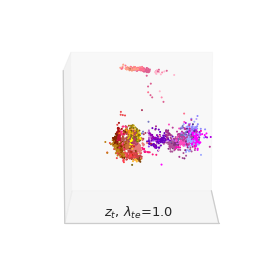

In [5]:
ax,sc = scatter3(D['zT'],O['cluster_color'],xlims,ylims,zlims)
ax.set_title(r'$z_t$, $\lambda_{te}$='+csTE.replace('-','.'),pad=padval,fontsize=fontsizeval)
ax.view_init(elev=init_elev, azim=0)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
anim.save('../assets/3d_z_t_'+csTE+'.gif', dpi=150, writer='imagemagick')

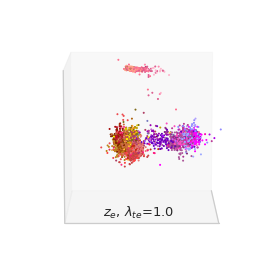

In [6]:
ax,sc = scatter3(D['zE'],O['cluster_color'],xlims,ylims,zlims)
ax.set_title(r'$z_e$, $\lambda_{te}$='+csTE.replace('-','.'),pad=padval,fontsize=fontsizeval)
ax.view_init(elev=init_elev, azim=0)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
anim.save('../assets/3d_z_e_'+csTE+'.gif', dpi=150, writer='imagemagick')

In [ ]:
# Use below for display within notebook
# anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
# HTML(anim.to_html5_video())